In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# make_moons

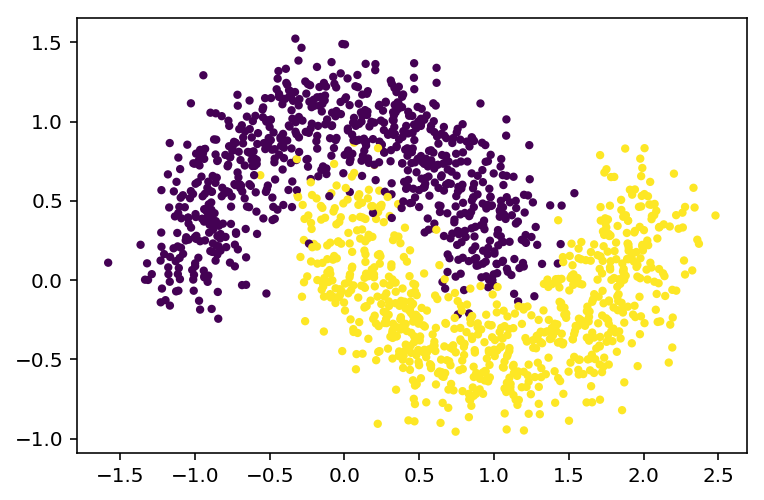

In [177]:
n_samples = 1500
dataset = make_moons(n_samples=n_samples, noise=0.2)
X, y = dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
plt.scatter(X[:, 0], X[:, 1], s=10, c = y)

In [180]:
model = Sequential()

model.add(Dense(output_dim=10, input_shape=(2, ),activation='relu', init='glorot_uniform'))
model.add(Dense(output_dim=10, activation='relu', init='glorot_uniform'))

model.add(Dense(output_dim=1, activation='sigmoid', init='glorot_uniform'))

model.compile(loss='binary_crossentropy', optimizer='adadelta',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_76 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(2,), activation="relu", units=10, kernel_initializer="glorot_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.
/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [181]:
history = model.fit(X_train, y_train, nb_epoch=1000, shuffle=True,
          verbose=0, validation_data=(X_test, y_test))

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


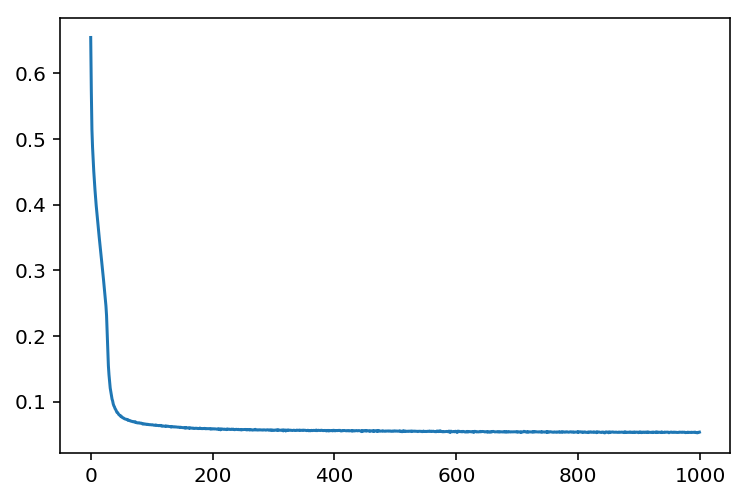

In [182]:
plt.plot(history.history['loss'])

In [183]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10087443603791245
Test accuracy: 0.9777777777777777


In [184]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb392564f98>)

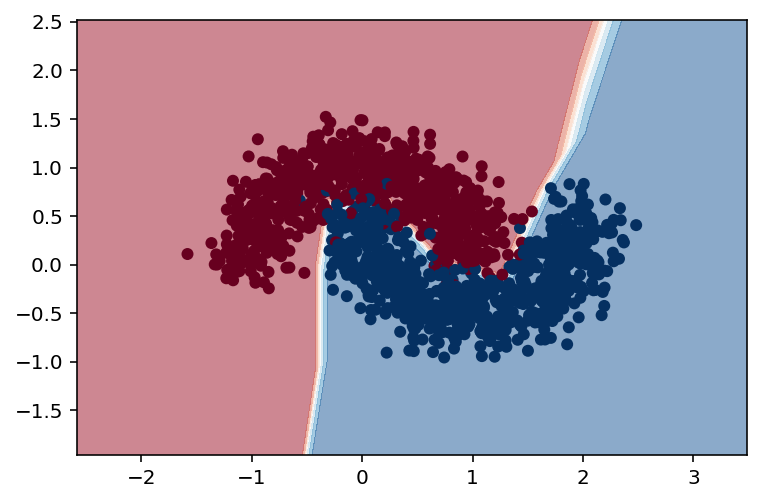

In [185]:
plot_decision_boundary(X, y, model, cmap='RdBu')

# MNIST

In [224]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [227]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)

In [228]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

In [229]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [230]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [239]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], activation='relu'))

model.add(Flatten())
model.add(Dense(nb_classes,activation='softmax' ))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


In [240]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 24, 32)        7520      
_________________________________________________________________
flatten_11 (Flatten)         (None, 23040)             0         
_________________________________________________________________
dense_103 (Dense)            (None, 10)                230410    
Total params: 238,250
Trainable params: 238,250
Non-trainable params: 0
_________________________________________________________________


In [241]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=5,
          verbose=1, validation_data=(X_test, Y_test))

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2457 - acc: 0.9270 - val_loss: 0.0960 - val_acc: 0.9709
Epoch 2/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0695 - acc: 0.9794 - val_loss: 0.0499 - val_acc: 0.9838
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0466 - acc: 0.9861 - val_loss: 0.0442 - val_acc: 0.9856
Epoch 4/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0349 - acc: 0.9897 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 5/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0274 - acc: 0.9917 - val_loss: 0.0412 - val_acc: 0.9860


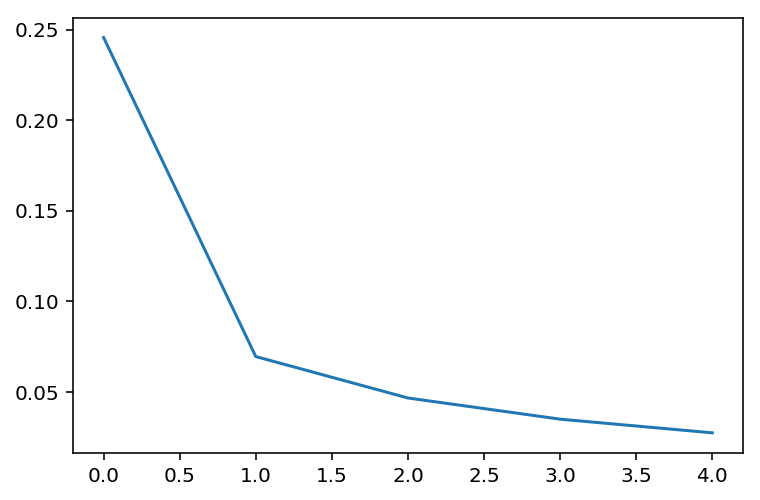

In [242]:
plt.plot(history.history['loss'])

In [243]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.041246925910911524
Test accuracy: 0.986
